# Credit Risk Analysis

In [1]:
# standard inputs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data was taken from - https://drive.google.com/drive/folders/1R1w6EgE0tZl265KAd8fqeFev9p29AMoP

In [2]:
df = pd.read_csv('data/lending_club_loan_dataset.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.shape

(396030, 27)

There are 26 features and 1 target variable and with 3 Lakh+ data is large.

In [5]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

## Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

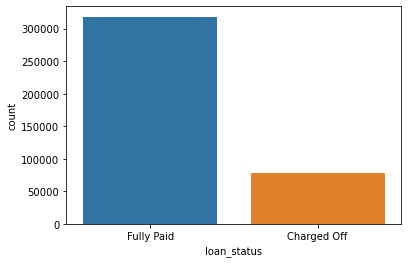

In [6]:
sns.countplot(x='loan_status', data=df)

In [7]:
df['loan_status'].value_counts()*100/len(df)

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

This dataset is imbalanced as the data tilts for towards fully paid loan status.

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

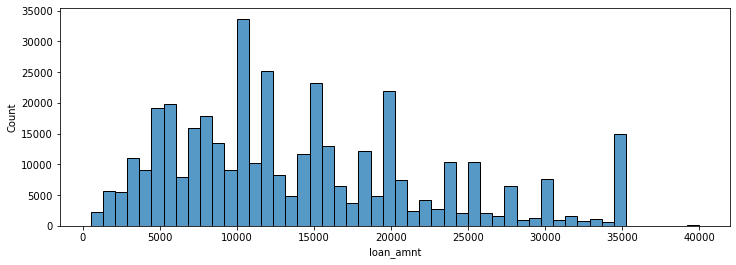

In [8]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'], bins=50)

It is a right-skewed distribution because it has a long right tail and there is an outlier where people have taken a loan of 40,000.

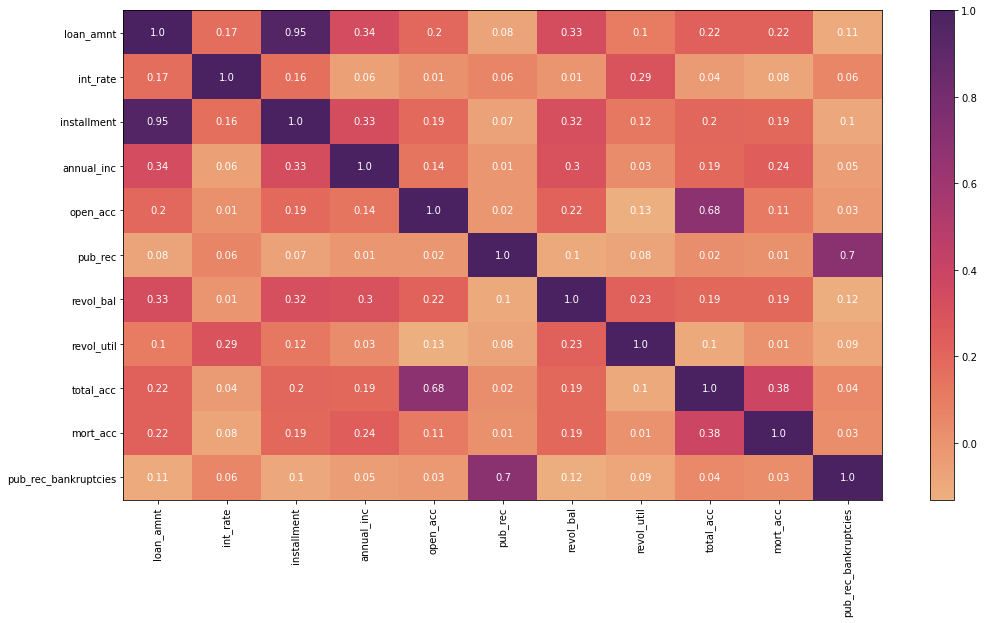

In [9]:
fig, ax = plt.subplots(figsize = (17, 9))
data_cor  = df.drop(columns=['term', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address'])
corr_matrix = data_cor.corr(method='pearson')
# print(corr_matrix.iloc[0:1], corr_matrix['Income'])
# corr_heatmap = sns.heatmap(corr_matrix, cmap ="flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.imshow(corr_matrix, cmap='flare', aspect='auto')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
for i in range(len(data_cor.columns)):
    for j in range(len(data_cor.columns)):
        plt.annotate(round(abs(corr_matrix.to_numpy()[i, j]), 2), xy=(j, i), ha='center', va='center', color='white')
# Add colorbar
plt.colorbar()

plt.show()

Conclusion from the heat map are:
* `loan_amnt` (loan amount) is highly correlated with `installment`. This is beacause installments are calculated on the loan amount.
* `open_acc` (open account) is highly correlated with `total_acc` (total number of accounts). This is because if you opening an account is a subst of the total number of accounts.

Let us see how the relationship between loan_amnt and installment looks like:

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

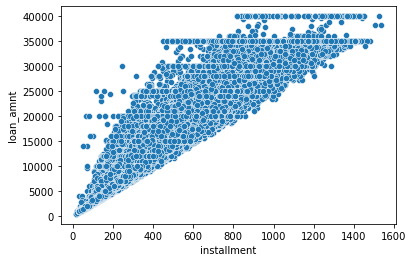

In [10]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

The graph looks disoriented as the number of installments increases with increase in the loan amount.

Next, we check how the `loan_amnt` affects the target variable, i.e., `loan_status`:

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

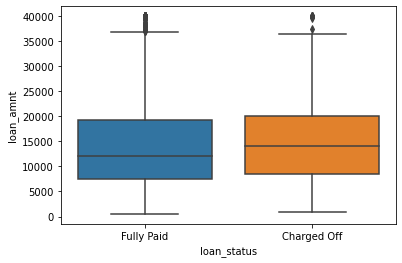

In [11]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

As the median line of the two box plots are almost equal we assume that the `loan_amnt` is not a good factor in deciding whether a person will default or not.

We `groupby()` on `loan_status` we check the statistical summary.

In [12]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


`grade` gives us the grade given to a person who is paying there bills. If it is low that means they aren't paying back on time and vice-versa.

<AxesSubplot:xlabel='grade', ylabel='count'>

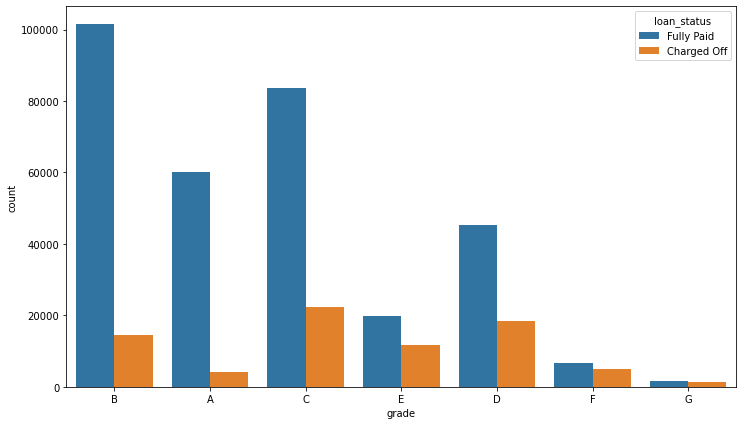

In [13]:
plt.figure(figsize=(12,7)) 
sns.countplot(x='grade', hue='loan_status', data=df)

Here we find that as the grade decrease the default rate increases.

To check based on each grade we find that the percentage increases.

In [14]:
df[df['grade']=='A'].groupby('loan_status')['grade'].count()*100/len(df[df['grade']=='A'])

loan_status
Charged Off     6.287878
Fully Paid     93.712122
Name: grade, dtype: float64

In [15]:
df[df['grade']=='B'].groupby('loan_status')['grade'].count()*100/len(df[df['grade']=='B'])

loan_status
Charged Off    12.573049
Fully Paid     87.426951
Name: grade, dtype: float64

In [16]:
df[df['grade']=='G'].groupby('loan_status')['grade'].count()*100/len(df[df['grade']=='G'])

loan_status
Charged Off    47.8389
Fully Paid     52.1611
Name: grade, dtype: float64

The sub grade over loan_status for more specificity.

In [17]:
sub_order = sorted(df['sub_grade'].unique())

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

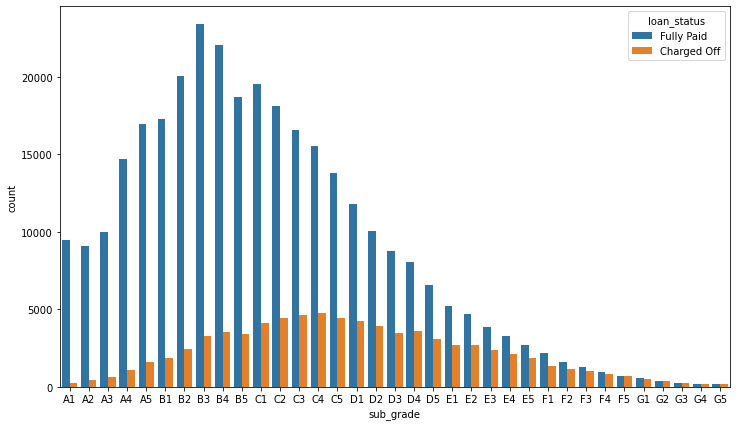

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x='sub_grade', hue='loan_status', order=sub_order, data=df)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

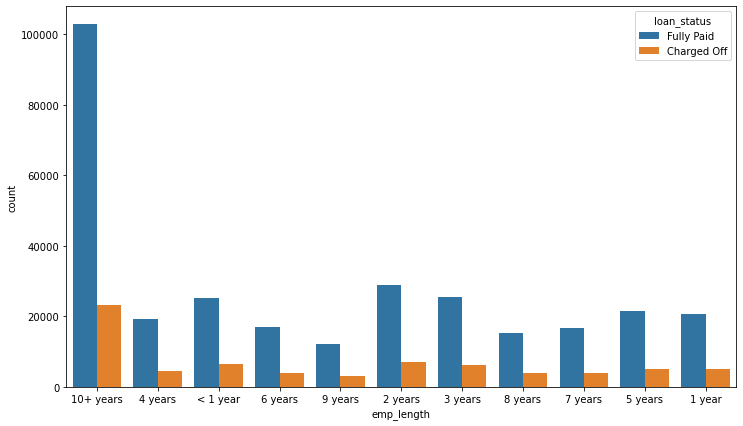

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(x='emp_length', hue='loan_status', data=df)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

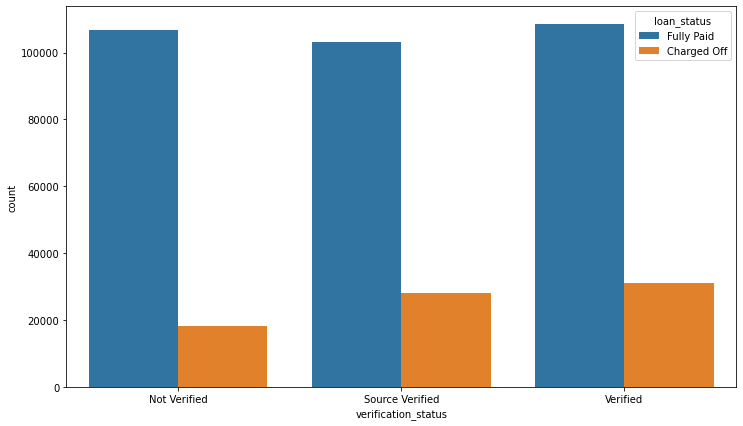

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(x='verification_status', hue='loan_status', data=df)

The graph tells us that the company verification process is not affective. If it was affective the charged off count should decreace on verification.

Let's check the correlation of loan_status with other variables:

In [21]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

<AxesSubplot:>

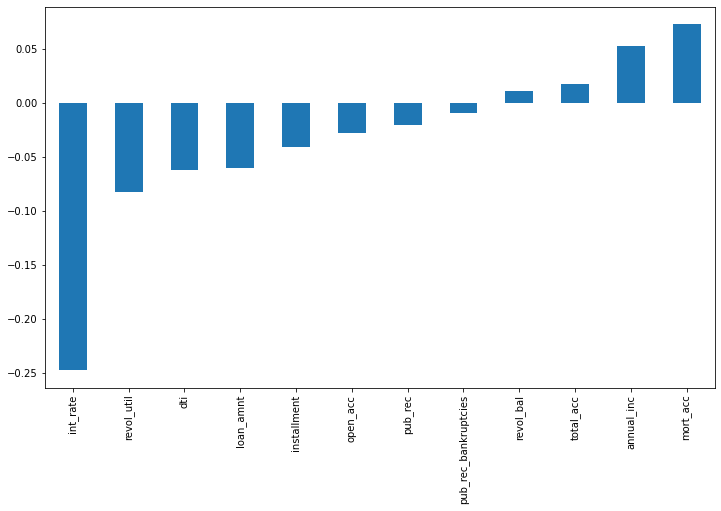

In [22]:
plt.figure(figsize=(12,7))

numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_series = numeric_df.corr()['loan_status'].sort_values().drop('loan_status')
correlation_series.plot(kind='bar')

## Remove null values

We will remove the missing values that are more than 90%.

In [23]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

We drop the garbage variable and fill the important variables.

In [24]:
df.drop('emp_title', axis=1, inplace=True)

In [25]:
df.drop('emp_length', axis=1, inplace=True)

In [26]:
df.drop('title', axis=1, inplace=True)

In [27]:
df['mort_acc'] = df['mort_acc'].fillna(np.mean(df['mort_acc']))

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## Feature Selection and Engineering

we will convert the variables from which we can extract data.

In [30]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Extract the number or months from the `term` variable.

In [31]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [32]:
df.drop('sub_grade', axis=1, inplace=True)

In [33]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

As NONE and ANY are very little, we will add them to the OTHER.

In [34]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [35]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

Extract the zip code from the address variable.

In [36]:
df['zip'] = df['address'].apply(lambda x: x[-5:])

In [37]:
df.drop(columns=['address'], axis=1, inplace=True)

Extract the year from the variable.

In [38]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x[-4:])

We will convert the `pub_rec` (public record) variable into a binary.

In [39]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 0 if x == 0 else 1)

Now, we will convert all the categorical variable into numerical using numerical encoding.

In [40]:
cols = df.select_dtypes(['object']).columns

In [41]:
def ordinal_mapper(data, var):
    ordinal_map = {k:i for i, k in enumerate(data[var].unique(), 0)}
    data[var] = data[var].map(ordinal_map)

In [42]:
for var in cols:
    ordinal_mapper(df, var)

## Splitting data into Train and Test datasets

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Buiding and Optimization

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import logging
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
# creating model
model = Sequential()

# adding layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# parameters for early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [49]:
# running the model
model.fit(x=X_train, y=Y_train, epochs=25, batch_size=256, validation_data=(X_test, Y_test), callbacks=[early_stop])

Epoch 1/25
1035/1035 [==============================] - 3s 2ms/step - loss: 0.4428 - val_loss: 0.3860
Epoch 2/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.3836 - val_loss: 0.3640
Epoch 3/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.3720 - val_loss: 0.3552
Epoch 4/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.3553 - val_loss: 0.3194
Epoch 5/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.3204 - val_loss: 0.2762
Epoch 6/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2884 - val_loss: 0.2637
Epoch 7/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2796 - val_loss: 0.2622
Epoch 8/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2757 - val_loss: 0.2617
Epoch 9/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2744 - val_loss: 0.2621
Epoch 10/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.272

<AxesSubplot:>

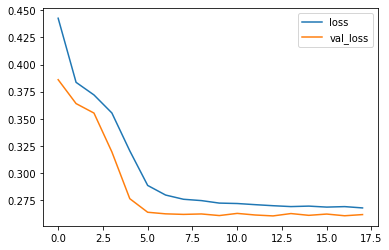

In [50]:
# plotting the losses
loss = pd.DataFrame(model.history.history)

loss.plot()

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
predict = model.predict(X_test)
print(classification_report(Y_test, predict > 0.5))
print(confusion_matrix)

4076/4076 [==============================] - 2s 552us/step
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     25480
           1       0.88      1.00      0.94    104943

    accuracy                           0.89    130423
   macro avg       0.94      0.71      0.77    130423
weighted avg       0.90      0.89      0.87    130423

<function confusion_matrix at 0x000001A5CD6581F0>


We get an accuracy of 89% using tensorflow.

In [52]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [53]:
algo = [LinearSVC(),
        LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000),
        GaussianNB(),
        RandomForestClassifier(random_state=0, n_estimators=10)]

In [54]:
def model_clf(x):
    cl = x
    cl.fit(X_train, Y_train)
    predict = cl.predict(X_test)
    print(classification_report(Y_test, predict))

In [55]:
for alg in algo:
    model_clf(alg)

              precision    recall  f1-score   support

           0       0.72      0.10      0.18     25480
           1       0.82      0.99      0.90    104943

    accuracy                           0.82    130423
   macro avg       0.77      0.55      0.54    130423
weighted avg       0.80      0.82      0.76    130423

              precision    recall  f1-score   support

           0       0.65      0.17      0.28     25480
           1       0.83      0.98      0.90    104943

    accuracy                           0.82    130423
   macro avg       0.74      0.58      0.59    130423
weighted avg       0.80      0.82      0.78    130423

              precision    recall  f1-score   support

           0       0.50      0.22      0.30     25480
           1       0.83      0.95      0.89    104943

    accuracy                           0.80    130423
   macro avg       0.67      0.58      0.59    130423
weighted avg       0.77      0.80      0.77    130423

              preci

Here, we see that our model gave similar result in Neural Network and Random Forest Classifier. Hence, we should choose either one of them to predict defaults on loan for a better accuracy.